## Stacks batch 1 - align to Atlantic cod genome

I'm going to create fasta files of the loci that were retained to the end of filtering, and then align these sequences to the Atlantic cod genome using NCBI's BLAST. 

In [1]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Compare-repo/notebooks'

In [2]:
cd ../

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Compare-repo


### "Final Filtered" : Loci missing data 20%, Individuals missing data 20%, no HWE

#### Make fasta file

In [3]:
cd scripts

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Compare-repo/scripts


In [4]:
!python genBOWTIEfasta_from_matrix.py -h

usage: genBOWTIEfasta_from_matrix.py [-h] [-mat MATRIX] [-cat CATALOG]
                                     [-fasta FASTA_OUTPUT] [-p PATH]

create fasta file out of a 2x2 matrix with loci as column headers, individuals
as rows

optional arguments:
  -h, --help            show this help message and exit
  -mat MATRIX, --matrix MATRIX
                        filtered matrix file. columns must be loci
  -cat CATALOG, --catalog CATALOG
                        stacks batch.catalog.tags.tsv file
  -fasta FASTA_OUTPUT, --fasta_output FASTA_OUTPUT
                        output file, in fasta format
  -p PATH, --path PATH  path to stacks files, including matrix and catalog
                        input files


In [6]:
!python genBOWTIEfasta_from_matrix.py \
-mat batch_1.filteredLoci_filteredMAF_Loci2_filteredIndivids \
-cat batch_1.catalog.tags.tsv \
-fasta batch_1_FinalFiltered_fasta.fa \
-p ../stacks_b1_wgenome

Reading loci from file:
batch_1.filteredLoci_filteredMAF_Loci2_filteredIndivids
Reading sequences from file:
batch_1.catalog.tags.tsv
Writing new fasta file...
Done.


In [7]:
cd ../

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Compare-repo


In [8]:
!mv stacks_b1_wgenome/batch_1_FinalFiltered_fasta.fa fasta_inputs/batch_1_FinalFiltered_fasta.fa

#### Align fasta file

In [9]:
!blastn -query fasta_inputs/batch_1_FinalFiltered_fasta.fa \
-db ACod_reference/Gadus_morhua \
-out blast_outputs/batch_1_FinalFiltered_fasta.fa \
-outfmt 10

#### RESULTS

<br>
**(1)** How many unique alignments?

In [10]:
cd blast_outputs

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Compare-repo/blast_outputs


In [11]:
!cat batch_1_FinalFiltered_fasta.fa | sed 's/,/ /' | awk '{print $1}' | sort | uniq | wc -l

1391


In [13]:
float(1391)/float(1415)

0.9830388692579505

**(2)** How many loci aligned more than once?

In [15]:
# use dictionary to keep track of how many times each unique Alaskan sequence aligned to the genome
myfile = open("batch_1_FinalFiltered_fasta.fa", "r")

combo_align = {}

for line in myfile:
    seq = line.strip().split(",")[0]
    scaffold = line.strip().split(",")[1]
    if seq not in combo_align.keys(): 
        combo_align[seq] = 1
    elif seq in combo_align.keys():
        count = combo_align[seq]
        count += 1
        combo_align[seq] = count
    
myfile.close()

all_counts = []
for seq in combo_align.keys():
    all_counts.append(combo_align[seq])

In [16]:
import numpy as np
import matplotlib.pyplot as plt

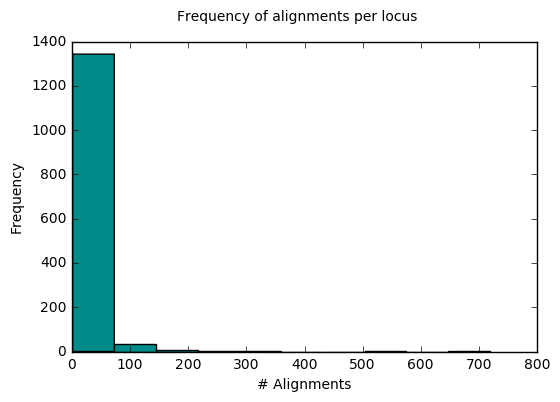

In [17]:
plt.hist(all_counts, color = "darkcyan")
plt.suptitle("Frequency of alignments per locus")
plt.xlabel("# Alignments")
plt.ylabel("Frequency")
plt.show()

In [18]:
plt.close()

**(3)** How many loci aligned only once?

In [19]:
len([i for i in all_counts if i ==1])

1072

In [20]:
float(1072)/float(1415)

0.7575971731448763

#### SUMMARY:

1. Out of 1415 loci, 1391 aligned to the Atlantic cod genome (98.3%)
2. Some of those loci aligned hundreds of times - to many different locations in the Atlantic cod genome
3. Out of 1415 loci, 1072 aligned to only one location in the Atlantic cod genome (75.8%)